In [7]:
!pip install plotly

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import plotly.express as px


   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ----- ---------------------------------- 1.3/9.6 MB 8.0 MB/s eta 0:00:02
   ----------- ---------------------------- 2.9/9.6 MB 8.0 MB/s eta 0:00:01
   ------------------- -------------------- 4.7/9.6 MB 8.3 MB/s eta 0:00:01
   -------------------------- ------------- 6.3/9.6 MB 8.0 MB/s eta 0:00:01
   -------------------------------- ------- 7.9/9.6 MB 7.8 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 7.9 MB/s eta 0:00:00

   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
  

In [8]:
plt.style.use('fivethirtyeight')

!pip install fredapi

In [26]:
from fredapi import Fred

pd.set_option('display.max_columns', 500)

In [14]:
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

In [16]:
fred_key = '7f2f1a3fe19db48ae44f4a22512bfc4f'

## 1.Create the Fred Object



In [22]:
fred = Fred(api_key=fred_key)

## 2. Search the economic data!

In [24]:
help(fred)

Help on Fred in module fredapi.fred object:

class Fred(builtins.object)
 |  Fred(api_key=None, api_key_file=None, proxies=None)
 |
 |  Methods defined here:
 |
 |  __init__(self, api_key=None, api_key_file=None, proxies=None)
 |      Initialize the Fred class that provides useful functions to query the Fred dataset. You need to specify a valid
 |      API key in one of 3 ways: pass the string via api_key, or set api_key_file to a file with the api key in the
 |      first line, or set the environment variable 'FRED_API_KEY' to the value of your api key.
 |
 |      Parameters
 |      ----------
 |      api_key : str
 |          API key. A free api key can be obtained on the Fred website at http://research.stlouisfed.org/fred2/.
 |      api_key_file : str
 |          Path to a file containing the api key.
 |      proxies : dict
 |          Proxies specifications: a dictionary mapping protocol names (e.g. 'http', 'https') to proxy URLs. If not provided, environment variables 'HTTP_PROXY'

In [29]:
fred.search('S&P', order_by='popularity')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2025-07-29,2025-07-29,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2025-07-25,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-07-28 07:09:08-05:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2025-07-29,2025-07-29,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2025-04-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2025-06-24 08:12:56-05:00,88,"For more information regarding the index, plea..."
SP500,SP500,2025-07-29,2025-07-29,S&P 500,2015-07-29,2025-07-28,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2025-07-28 19:01:58-05:00,83,The observations for the S&P 500 represent the...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2025-07-29,2025-07-29,ICE BofA US High Yield Index Effective Yield,1996-12-31,2025-07-25,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-07-28 07:09:12-05:00,82,This data represents the effective yield of th...
BAMLC0A0CM,BAMLC0A0CM,2025-07-29,2025-07-29,ICE BofA US Corporate Index Option-Adjusted Sp...,1996-12-31,2025-07-25,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-07-28 07:23:03-05:00,78,The ICE BofA Option-Adjusted Spreads (OASs) ar...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DDDI12SMA156NWDB,DDDI12SMA156NWDB,2025-07-29,2025-07-29,Private Credit by Deposit Money Banks and Othe...,2001-01-01,2020-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2024-05-07 15:28:48-05:00,3,Private credit by deposit money banks and othe...
Q03069USQ605NNBR,Q03069USQ605NNBR,2025-07-29,2025-07-29,"Revenue Freight Tons Originated, Less Than Car...",1920-01-01,1943-07-01,Quarterly,Q,Thousands of Tons,Thous. Of Tons,Not Seasonally Adjusted,NSA,2012-08-16 14:05:10-05:00,3,"Source: Interstate Commerce Commission, Data F..."
CSHICPCZA156NRUG,CSHICPCZA156NRUG,2025-07-29,2025-07-29,Share of Gross Capital Formation at Current Pu...,1990-01-01,2019-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2021-11-08 13:36:33-06:00,3,Source ID: csh_i When using these data in you...


## 3. Pull Raw Data

In [33]:
sp500 = fred.get_series(series_id='SP500')


<Axes: title={'center': 'S&P500'}>

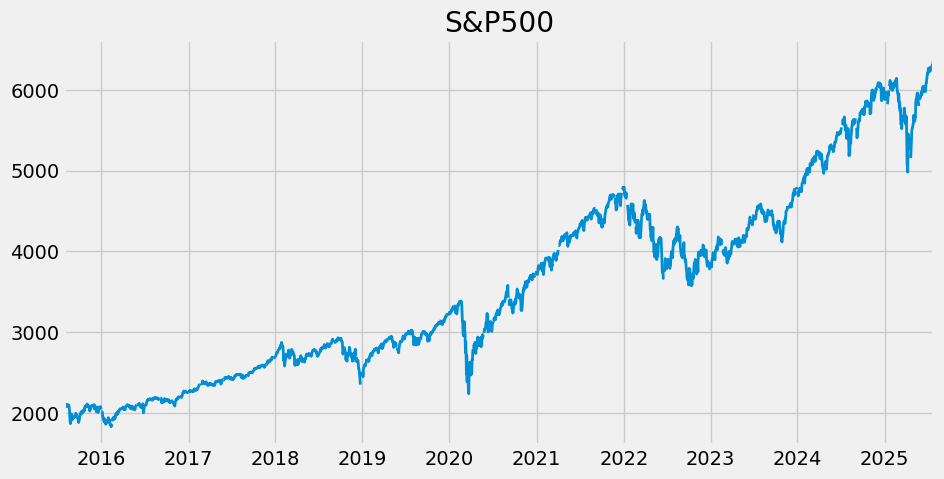

In [36]:
sp500.plot(figsize=(10,5), title='S&P500', lw=2 )

## 4. Pull and Join Multiple Data Series

In [38]:
uemp_results = fred.search('unemployment')

In [39]:
!git init


Reinitialized existing Git repository in D:/Repository/Learning/Python/.git/


In [41]:
!git branch

* master


In [43]:
!git remote -v

origin	git@github.com:markselvan/python_learning.git (fetch)
origin	git@github.com:markselvan/python_learning.git (push)


In [44]:
!git status

On branch master
Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	new file:   eda.ipynb
	new file:   flights-10k.parquet
	modified:   hello.py

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   eda.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/Economic Data Analysis-checkpoint.ipynb
	.ipynb_checkpoints/eda-checkpoint.ipynb
	Economic Data Analysis.ipynb

